In [28]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pygem_eb.processing.plotting_fxns import *
from objectives import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
data_fp = '/home/claire/research/MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv'
path_out = '/home/claire/research/Output/calibration/09_17/'
plot_site = 'AB'
aa = [0.4,0.5,0.6]
kkii = [1.5,2.0,2.5]
kkss = [0.4,0.5,0.6]
params = np.array([aa,kkii,kkss])
winter_result = np.ones((3,len(aa),len(kkii),len(kkss)))
summer_result = np.ones((3,len(aa),len(kkii),len(kkss)))
site_avg_winter = np.ones((len(aa),len(kkii),len(kkss)))
site_avg_summer = np.ones((len(aa),len(kkii),len(kkss)))
label = []

for i,a_ice in enumerate(aa):
    for j,k_ice in enumerate(kkii):
        for k,k_snow in enumerate(kkss):
            print(f'       kice: {k_ice}    ksnow: {k_snow}    aice: {a_ice}')
            label.append(f'{path_out}kice{k_ice}_ksnow{k_snow}_aice{a_ice}_site{plot_site}_0.nc')
            for s,site in enumerate(['AB','B','D']):
                fn = f'{path_out}kice{k_ice}_ksnow{k_snow}_aice{a_ice}_site{site}_0.nc'
                try:
                    ds,startdate,enddate = getds(fn)
                    winter,summer = seasonal_mass_balance(data_fp,ds,site=site,method='MAE')
                    winter_result[s,i,j,k] = winter
                    summer_result[s,i,j,k] = summer
                except:
                    winter_result[s,i,j,k] = np.nan
                    summer_result[s,i,j,k] = np.nan
                    print(fn+' does not exist')
            site_avg_winter[i,j,k] = np.mean(winter_result[:,i,j,k])
            site_avg_summer[i,j,k] = np.mean(summer_result[:,i,j,k])
best_winter = np.argmin(site_avg_winter)
best_summer = np.argmin(site_avg_summer)

print(f'Best winter run for was '+label[best_winter])
print(f'Best summer run for was '+label[best_summer])

# ds = xr.open_dataset(label[best_summer])
# fig,ax = seasonal_mass_balance(data_fp,ds,site=plot_site,plot=True)
# fig.suptitle(f'Best summer run between all sites, at site {plot_site}')
# plt.savefig(f'/home/claire/research/Output/calibration/best_summer_{plot_site}.png',dpi=200)

# ds = xr.open_dataset(label[best_winter])
# fig,ax = seasonal_mass_balance(data_fp,ds,site=plot_site,plot=True)
# fig.suptitle(f'Best winter run between all sites, at site {plot_site}')
# plt.savefig(f'/home/claire/research/Output/calibration/best_winter_{plot_site}.png',dpi=200)

       kice: 1.5    ksnow: 0.4    aice: 0.4
       kice: 1.5    ksnow: 0.5    aice: 0.4
       kice: 1.5    ksnow: 0.6    aice: 0.4
       kice: 2.0    ksnow: 0.4    aice: 0.4
       kice: 2.0    ksnow: 0.5    aice: 0.4
       kice: 2.0    ksnow: 0.6    aice: 0.4
/home/claire/research/Output/calibration/09_17/kice2.0_ksnow0.6_aice0.4_siteB_0.nc does not exist
       kice: 2.5    ksnow: 0.4    aice: 0.4
       kice: 2.5    ksnow: 0.5    aice: 0.4
/home/claire/research/Output/calibration/09_17/kice2.5_ksnow0.5_aice0.4_siteAB_0.nc does not exist
       kice: 2.5    ksnow: 0.6    aice: 0.4
       kice: 1.5    ksnow: 0.4    aice: 0.5
       kice: 1.5    ksnow: 0.5    aice: 0.5
       kice: 1.5    ksnow: 0.6    aice: 0.5
       kice: 2.0    ksnow: 0.4    aice: 0.5
       kice: 2.0    ksnow: 0.5    aice: 0.5
       kice: 2.0    ksnow: 0.6    aice: 0.5
       kice: 2.5    ksnow: 0.4    aice: 0.5
/home/claire/research/Output/calibration/09_17/kice2.5_ksnow0.4_aice0.5_siteB_0.nc does not exist
 

TypeError: Colorbar.__init__() got an unexpected keyword argument 'title'

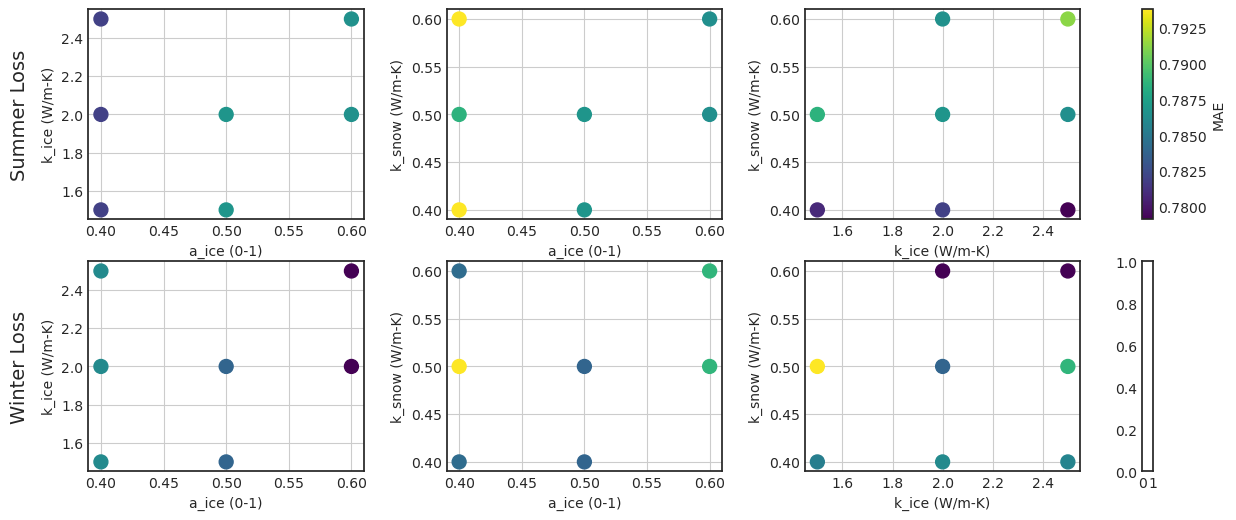

In [63]:
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(2,3, wspace=0.3)
# Normalize RMSE values across all three plots for shared colorbar
all_summer = site_avg_summer[~np.isnan(site_avg_summer)].flatten()
all_winter = site_avg_winter[~np.isnan(site_avg_winter)].flatten()
norm_summer = plt.Normalize(vmin=np.min(all_summer), vmax=np.max(all_summer))
norm_winter = plt.Normalize(vmin=np.min(all_winter), vmax=np.max(all_winter))

# Create the scatter plots
ax1 = fig.add_subplot(gs[0,0])
x,y = np.meshgrid(aa,kkii)
sc1 = ax1.scatter(x,y, c=site_avg_summer[:,:,1], cmap='viridis', s=100,norm=norm_summer)
ax1.set_xlabel('a_ice (0-1)')
ax1.set_ylabel('k_ice (W/m-K)')
ax1.text(-0.25,0.5,'Summer Loss',fontsize=14,ha='center', va='center', rotation='vertical', transform=ax1.transAxes)
ax1.grid(True)

ax2 = fig.add_subplot(gs[0,1])
x,y = np.meshgrid(aa,kkss)
sc2 = ax2.scatter(x,y, c=site_avg_summer[:,1,:], cmap='viridis', s=100,norm=norm_summer)
ax2.set_xlabel('a_ice (0-1)')
ax2.set_ylabel('k_snow (W/m-K)')
ax2.grid(True)

ax3 = fig.add_subplot(gs[0,2])
x,y = np.meshgrid(kkii,kkss)
sc3 = ax3.scatter(x,y, c=site_avg_summer[1,:,:], cmap='viridis', s=100,norm=norm_summer)
ax3.set_xlabel('k_ice (W/m-K)')
ax3.set_ylabel('k_snow (W/m-K)')
ax3.grid(True)

ax4 = fig.add_subplot(gs[1,0])
x,y = np.meshgrid(aa,kkii)
sc4 = ax4.scatter(x,y, c=site_avg_winter[:,:,1], cmap='viridis', s=100,norm=norm_winter)
ax4.set_xlabel('a_ice (0-1)')
ax4.text(-0.25,0.5,'Winter Loss',fontsize=14,ha='center', va='center', rotation='vertical', transform=ax4.transAxes)
ax4.set_ylabel('k_ice (W/m-K)')
ax4.set_xticks(aa)
ax4.set_yticks(kkii)
ax4.grid(True)

ax5 = fig.add_subplot(gs[1,1])
x,y = np.meshgrid(aa,kkss)
sc2 = ax5.scatter(x,y, c=site_avg_winter[:,1,:], cmap='viridis', s=100,norm=norm_winter)
ax5.set_xlabel('a_ice (0-1)')
ax5.set_ylabel('k_snow (W/m-K)')
ax5.set_xticks(aa)
ax5.set_yticks(kkss)
ax5.grid(True)

ax6 = fig.add_subplot(gs[1,2])
x,y = np.meshgrid(kkii,kkss)
sc3 = ax6.scatter(x,y, c=site_avg_winter[1,:,:], cmap='viridis', s=100, norm=norm_winter)
ax6.set_xlabel('k_ice (W/m-K)')
ax6.set_ylabel('k_snow (W/m-K)')
ax6.set_xticks(kkii)
ax6.set_yticks(kkss)
ax6.grid(True)

# Add a common colorbar for all scatter plots
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_summer, cmap='viridis'), ax=[ax1, ax2, ax3], orientation='vertical')
cbar.set_label('MAE')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_winter, cmap='viridis'), ax=[ax4, ax5, ax6], orientation='vertical')
cbar.set_label('MAE')


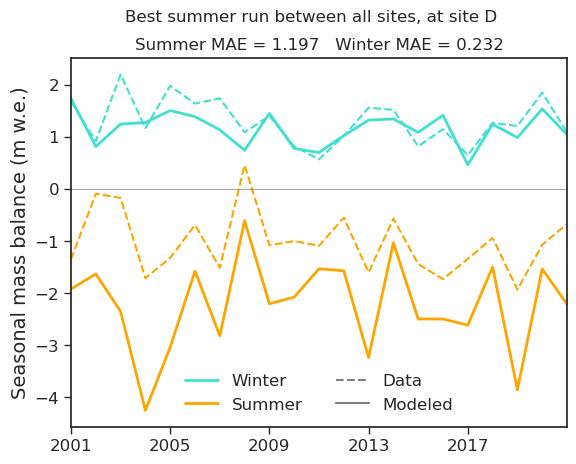

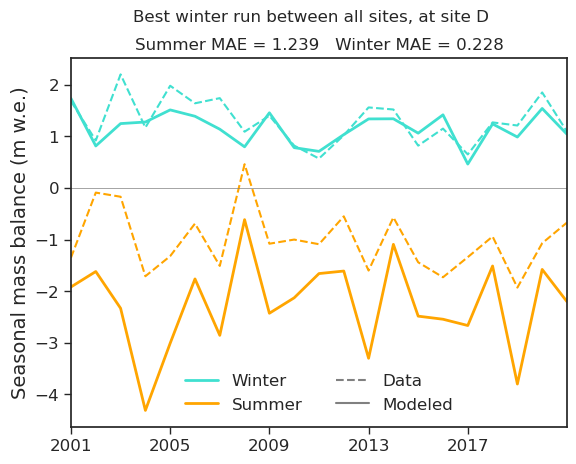

In [27]:
plot_site='D'
ds = xr.open_dataset(label[best_summer].replace('AB',plot_site))
fig,ax = seasonal_mass_balance(data_fp,ds,site=plot_site,plot=True)
fig.suptitle(f'Best summer run between all sites, at site {plot_site}')
plt.savefig(f'/home/claire/research/Output/calibration/best_summer_{plot_site}.png',dpi=200)

ds = xr.open_dataset(label[best_winter].replace('AB',plot_site))
fig,ax = seasonal_mass_balance(data_fp,ds,site=plot_site,plot=True)
fig.suptitle(f'Best winter run between all sites, at site {plot_site}')
plt.savefig(f'/home/claire/research/Output/calibration/best_winter_{plot_site}.png',dpi=200)

In [ ]:
for i,a_ice in enumerate(aa):
    for j,k_ice in enumerate(kkii):
        for k,k_snow in enumerate(kkss):
            

0.31938410126399275 1.3254640868778864


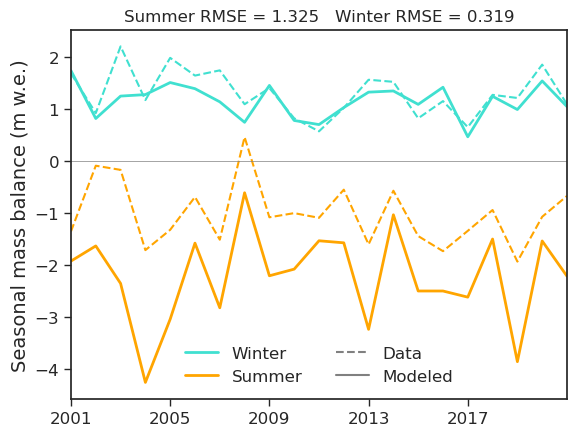

In [14]:
kicebest = 1.5
ksnowbest = 0.6
aicebest = 0.4
site = 'D'
ds = xr.open_dataset(f'/home/claire/research/Output/calibration/09_17/kice{kicebest}_ksnow{ksnowbest}_aice{aicebest}_site{site}_0.nc')

season = 'winter'
fig,ax = seasonal_mass_balance(data_fp,ds,site=site,plot=True)
plt.show()
# k = best[site][season].attrs['k_ice']
# a = best[site][season].attrs['a_ice']
# fig.suptitle(f'Best {season} run for {site} (a={a}, k={k})')
# plt.savefig(f'/home/claire/research/Output/calibration/best_{site}_{season}.png',dpi=150)
# print(k,a)

In [41]:
def plot_by(ds,bin,time,vars,t='Monthly EB Outputs',by='month'):
    h = 1.5
    fig,axes = plt.subplots(len(vars),1,figsize=(7,h*len(vars)),sharex=True,layout='constrained')
    if len(vars) == 1:
        axes = [axes]
    
    if by == 'month':
        ds[by] = (['time'],pd.to_datetime(ds['time'].values).month)
        time_list = np.arange(1,13)
    elif by == 'hour':
        ds[by] = (['time'],pd.to_datetime(ds['time'].values).hour)
        time_list = np.arange(0,24)
    elif by == 'doy':
        ds[by] = (['time'],pd.to_datetime(ds['time'].values).day_of_year)
        time_list = np.arange(1,366)

    if len(time) == 2:
        start = pd.to_datetime(time[0])
        end = pd.to_datetime(time[1])
        time = pd.date_range(start,end,freq='h')
    ds = ds.sel(time=time,bin=bin)
    c_iter = iter([plt.cm.Dark2(i) for i in range(8)])
    for i,v in enumerate(vars):
        axis = axes[i]
        vararray = np.array(v)
        for var in vararray:
            try:
                c = next(c_iter)
            except:
                c_iter = iter([plt.cm.Dark2(i) for i in range(8)])
                c = next(c_iter)
        
            var_out = []
            for time in time_list:
                ds_sel = ds.where(ds[by] == time,drop=True)
                if 'layer' in var:
                    vardata = ds_sel.isel(layer=0)[var].to_numpy()
                else:
                    vardata = ds_sel[var].to_numpy()
                mean = np.mean(vardata)
                var_out.append(mean)
            axis.plot(time_list,var_out,label=var,color=c)
            axis.legend()
            if by == 'doy':
                axis.axvline(111,color='green')
                axis.axvline(294,color='red')
    if by == 'month':
        months = pd.date_range('2024-01-01','2024-12-31',freq='MS')
        month_names = [date.month_name()[:3] for date in months]
        axis.set_xticks(np.arange(1,13),month_names)
    if by == 'doy':
        axis.set_xlabel('Day of year')
    axis.set_ylabel('Melt (mm w.e.)')
    axis.tick_params(length=5)
    fig.suptitle(t)

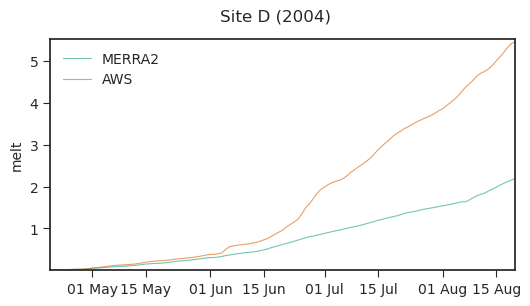

In [72]:
bin = 2
dslist = []
labels = []
ds_not,startdate,enddate = getds(f'~/research/Output/EB/a_0.1_k_0.5_0_bin{bin}.nc')
ds_AWS,startdate,enddate = getds(f'~/research/Output/EB/a_0.1_k_0.5_AWS_0_bin{bin}.nc')
dslist = [ds_not,ds_AWS]
labels = ['MERRA2','AWS']
compare_runs(dslist,0,['2004-04-20','2004-08-20'],['MERRA2','AWS'],'melt',t='Site D (2004)')

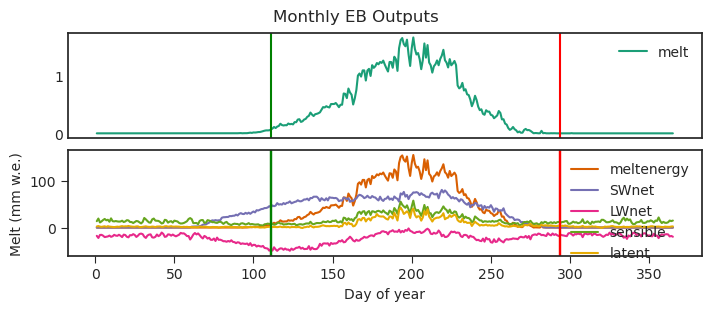

In [47]:

ds.melt.values *= 1000
plot_by(ds,0,[startdate,enddate],[['melt'],['meltenergy','SWnet','LWnet','sensible','latent']],by='doy')

In [ ]:
ds.melt.values *= 1000
plot_by(ds,0,[startdate,enddate],[['melt']],by='doy')